<a href="https://colab.research.google.com/github/anologicon/jat-rail-time-series/blob/master/JatRailTimeSeries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from pandas import Series
from sklearn.metrics import mean_squared_error 
from math import sqrt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from statsmodels.tsa.seasonal import seasonal_decompose

In [0]:
train = pd.read_csv("/content/drive/My Drive/Colab Notebooks/JetRail/train.csv");
test = pd.read_csv("/content/drive/My Drive/Colab Notebooks/JetRail/test.csv");

train_original = train.copy()
test_original = train.copy()

In [4]:
train.shape, test.shape

((18288, 3), (5112, 2))

In [0]:
train['Datetime'] = pd.to_datetime(train.Datetime, format='%d-%m-%Y %H:%M')
test['Datetime'] = pd.to_datetime(test.Datetime, format='%d-%m-%Y %H:%M')
test_original['Datetime'] = pd.to_datetime(test_original.Datetime, format='%d-%m-%Y %H:%M')
train_original['Datetime'] = pd.to_datetime(train_original.Datetime, format='%d-%m-%Y %H:%M')

In [0]:
# sometimes python scare me
for i in (train, test, test_original, train_original):
  i['year'] = i.Datetime.dt.year
  i['month'] = i.Datetime.dt.month
  i['day'] = i.Datetime.dt.day
  i['hour'] = i.Datetime.dt.hour

In [0]:
train['dayOfWeek'] = train.Datetime.dt.dayofweek
temp = train.Datetime

In [0]:
temp2 = train.Datetime.apply(lambda x:1 if(x.dayofweek == 5 or x.dayofweek == 6) else 0)
train['weekend'] = temp2

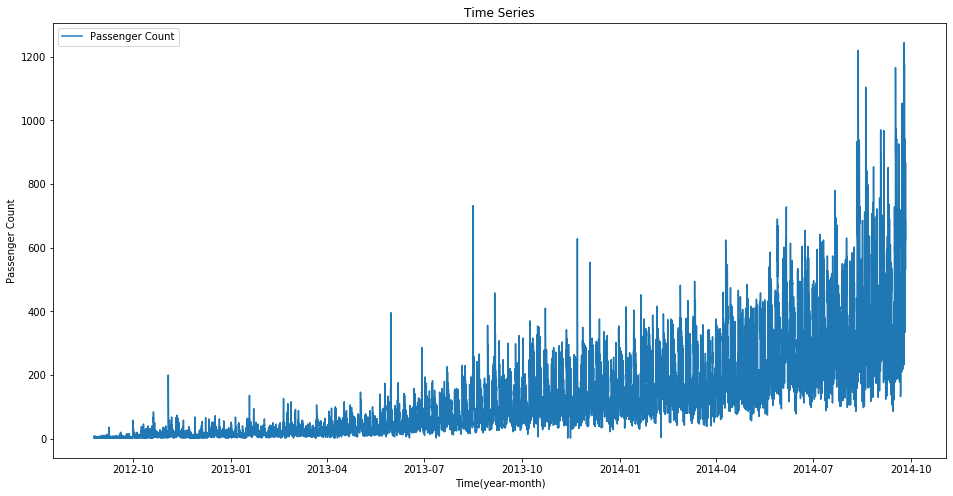

In [9]:
train.set_index('Datetime', inplace=True)

df = train.drop('ID', 1)

ts = df.Count

plt.figure(figsize=(16,8))
plt.plot(ts, label='Passenger Count')
plt.title('Time Series')
plt.xlabel('Time(year-month)')
plt.ylabel('Passenger Count')
plt.legend(loc='best')

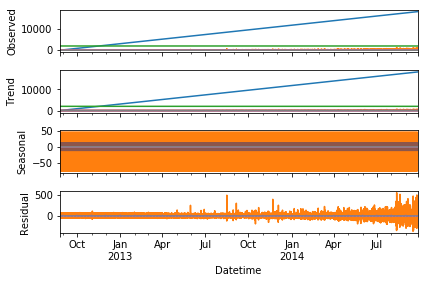

In [10]:
result = seasonal_decompose(train)

result.plot()
plt.show()

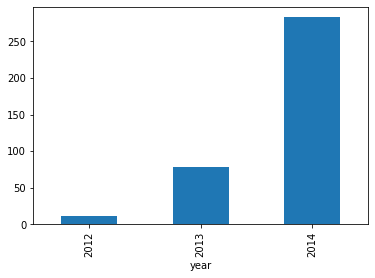

In [11]:
# Hypothesis - Traffic will increase as the yars pass by

train.groupby('year')['Count'].mean().plot.bar()

# That's a true hypothesis

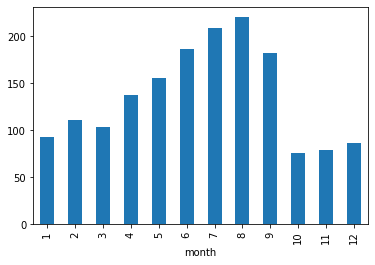

In [12]:
# Hypothesis - Increase in traffic from May to October

train.groupby('month')['Count'].mean().plot.bar()

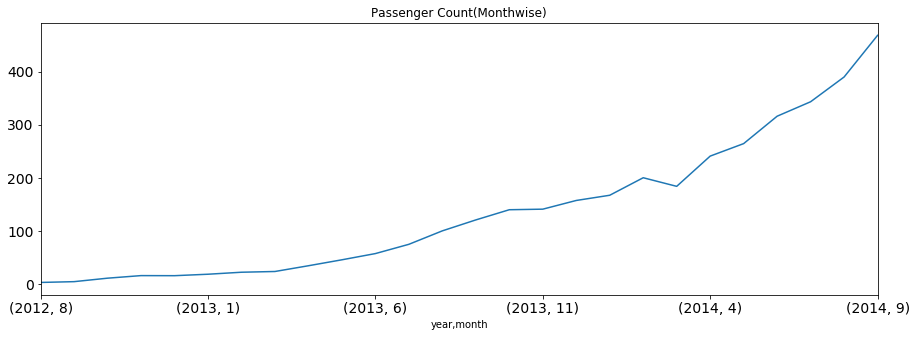

In [13]:
temp = train.groupby(['year', 'month'])['Count'].mean()

temp.plot(figsize=(15,5), title= 'Passenger Count(Monthwise)', fontsize=14)

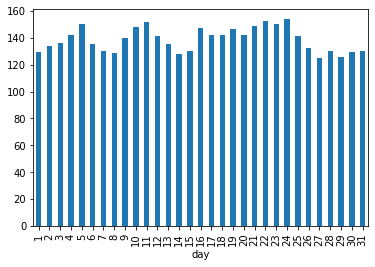

In [14]:
train.groupby('day')['Count'].mean().plot.bar()

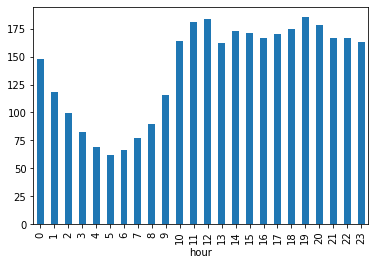

In [15]:
# Hypothesis 3 - peak hours

train.groupby('hour')['Count'].mean().plot.bar()

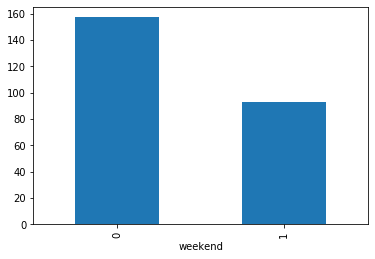

In [16]:
# Hypothesis 4 - Weekend
train.groupby('weekend')['Count'].mean().plot.bar()

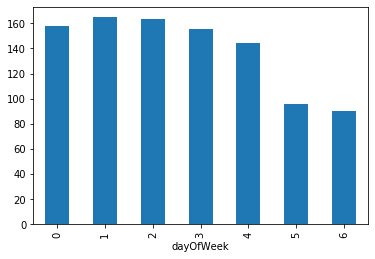

In [17]:
# Note - 0 is the starting of the week, ie. 0 is Monday and 6 Sunday.

train.groupby('dayOfWeek')['Count'].mean().plot.bar()

In [0]:
train = train.drop('ID', 1)

In [0]:
train.Timestamp = pd.to_datetime(train.index, format='%d-%m-%y %H:%M')

train.index = train.Timestamp

# Hourly time series
hourly = train.resample('H').mean()

# Converting to daily mean
daily = train.resample('D').mean()

# Converting to weekly mean
weekly = train.resample('W').mean()

# Converting to monthly mean
monthly = train.resample('M').mean()

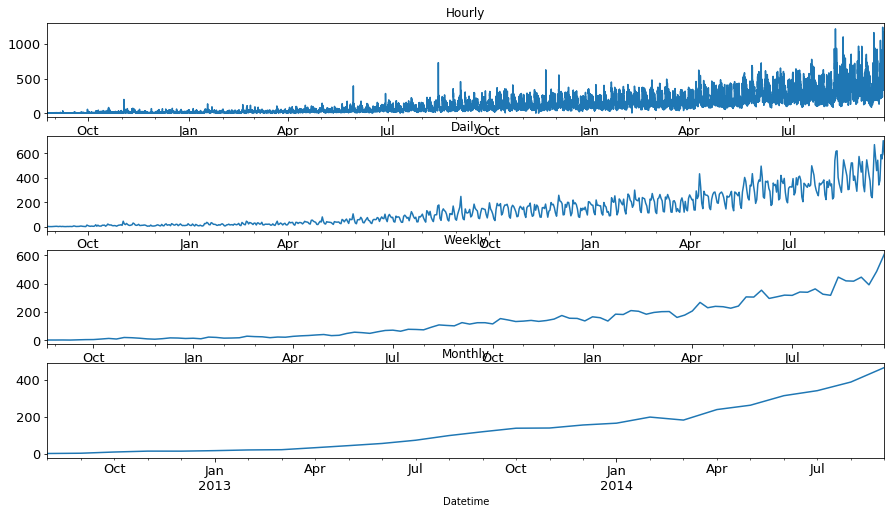

In [20]:
fig, axs = plt.subplots(4,1)

figsize = (15,8)

fontsize = 13;

hourly.Count.plot(figsize=figsize, title= 'Hourly', fontsize=fontsize, ax=axs[0])
daily.Count.plot(figsize=figsize, title= 'Daily', fontsize=fontsize, ax=axs[1])
weekly.Count.plot(figsize=figsize, title= 'Weekly', fontsize=fontsize, ax=axs[2])
monthly.Count.plot(figsize=figsize, title= 'Monthly', fontsize=fontsize, ax=axs[3])

plt.show()

In [0]:
test.Timestamp = pd.to_datetime(test.Datetime, format='%d-%m-%Y %H:%M')
test.index = test.Timestamp

# Converting to daily mean
test = test.resample('D').mean()

In [0]:
train.Timestamp = pd.to_datetime(train.index, format='%d-%m-%Y %H:%M')
train.index = train.Timestamp

# Converting to daily mean
train = train.resample('D').mean()

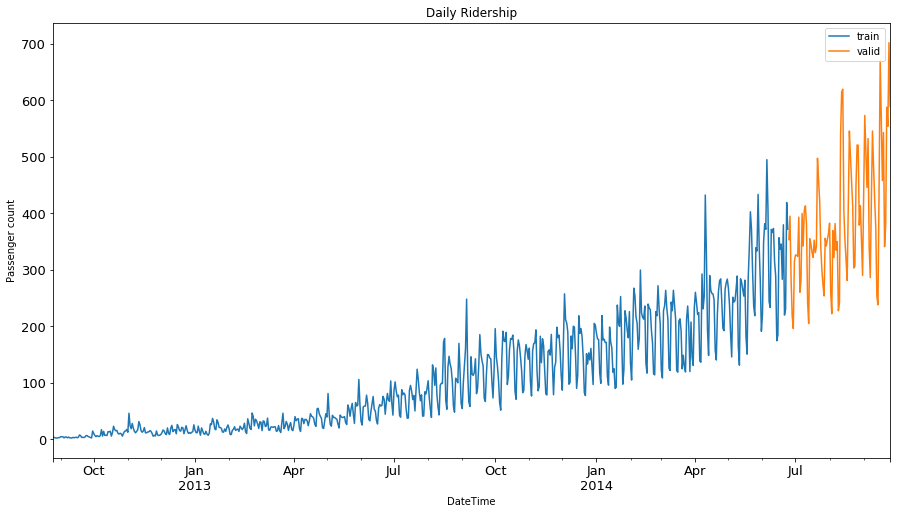

In [23]:
# Split data

Train = train.ix['2012-08-25':'2014-06-24']
valid = train.ix['2014-06-25':'2014-09-25']

Train.Count.plot(figsize=figsize, title= 'Daily Ridership', fontsize=fontsize, label='train')
valid.Count.plot(figsize=figsize, title= 'Daily Ridership', fontsize=fontsize, label='valid')

plt.xlabel("DateTime")
plt.ylabel("Passenger count")
plt.legend(loc='best')
plt.show()

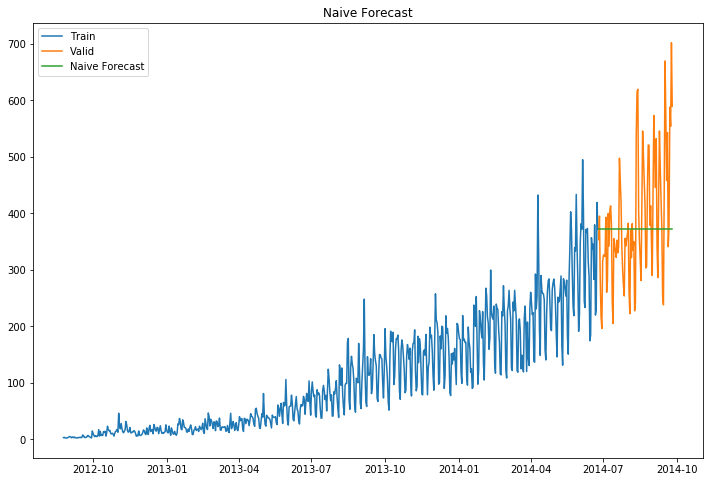

In [26]:
# Naive Approach

dd = np.asarray(Train.Count)
y_hat = valid.copy()
y_hat['naive'] = dd[len(dd)-1]

plt.figure(figsize=(12,8))
plt.plot(Train.index, Train['Count'], label='Train')
plt.plot(valid.index, valid['Count'], label='Valid')
plt.plot(y_hat.index, y_hat['naive'], label='Naive Forecast')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.show()

In [28]:
# RMSE (Root Mean Square Error)
rms = sqrt(mean_squared_error(valid.Count, y_hat.naive))
print(rms)

111.79050467496724


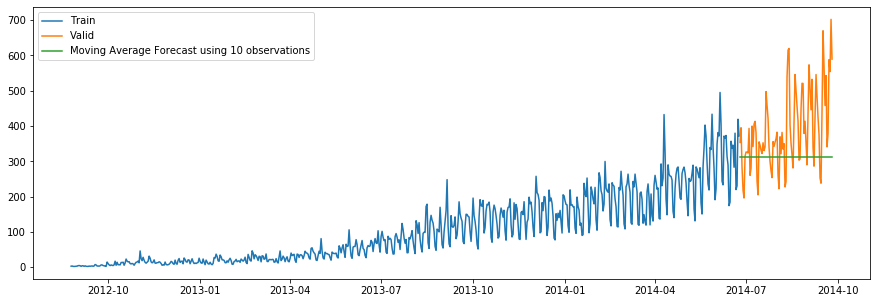

In [32]:
# Moving Average

# average of last 10 obsevations
y_hat_avg = valid.copy()
y_hat_avg['moving_avg_forecast'] = Train['Count'].rolling(10).mean().iloc[-1]

plt.figure(figsize=(15,5)) 
plt.plot(Train['Count'], label='Train') 
plt.plot(valid['Count'], label='Valid') 
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast using 10 observations') 
plt.legend(loc='best') 
plt.show()

In [33]:
rms = sqrt(mean_squared_error(valid.Count, y_hat_avg.moving_avg_forecast)) 
print(rms)

134.23733308950264


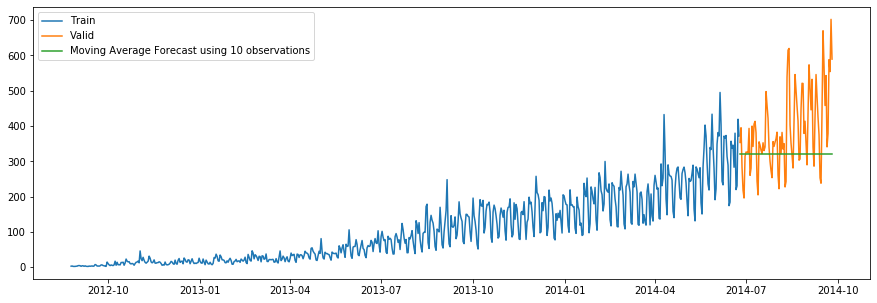

In [34]:
# avarage of last 20 observations

y_hat_avg['moving_avg_forecast'] = Train['Count'].rolling(20).mean().iloc[-1]

plt.figure(figsize=(15,5)) 
plt.plot(Train['Count'], label='Train') 
plt.plot(valid['Count'], label='Valid') 
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast using 10 observations') 
plt.legend(loc='best') 
plt.show()

In [35]:
rms = sqrt(mean_squared_error(valid.Count, y_hat_avg.moving_avg_forecast)) 
print(rms)

130.44984977550422


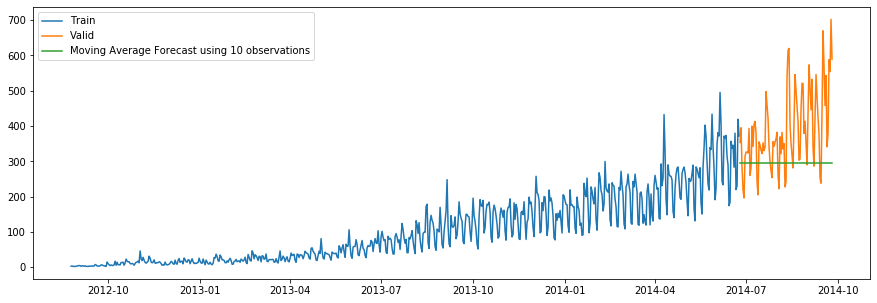

In [42]:
# avarage of last 50 observations

y_hat_avg['moving_avg_forecast'] = Train['Count'].rolling(50).mean().iloc[-1]

plt.figure(figsize=(15,5)) 
plt.plot(Train['Count'], label='Train') 
plt.plot(valid['Count'], label='Valid') 
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast using 10 observations') 
plt.legend(loc='best') 
plt.show()

In [43]:
rms = sqrt(mean_squared_error(valid.Count, y_hat_avg.moving_avg_forecast)) 
print(rms)

144.19175679986802
